# Aprendizaje profundo con PyTorch

El aprendizaje automático clásico se basa en el uso de estadísticas para determinar las relaciones entre las características y las etiquetas, y puede ser muy eficaz para crear modelos predictivos. Sin embargo, un crecimiento masivo en la disponibilidad de datos junto con los avances en la tecnología informática requerida para procesarlos ha llevado a la aparición de nuevas técnicas de aprendizaje automático que imitan la forma en que el cerebro procesa la información en una estructura llamada red neuronal artificial.

PyTorch es un marco para crear modelos de aprendizaje automático, incluidas redes neuronales profundas (DNN). En este ejemplo, usaremos PyTorch para crear una red neuronal simple que clasifique a los pingüinos en especies según la longitud y la profundidad de su culmen (pico), la longitud de sus aletas y su masa corporal.

> **Cita**: El conjunto de datos de pingüinos utilizado en este ejercicio es un subconjunto de datos recopilados y puestos a disposición por [Dr. kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
y la [Estación Palmer, Antártida LTER](https://pal.lternet.edu/), una
miembro de la [Investigación Ecológica a Largo Plazo
Red](https://lternet.edu/).

## Explore el conjunto de datos

Antes de comenzar a usar PyTorch para crear un modelo, carguemos los datos que necesitamos del conjunto de datos de pingüinos de Palmer Islands, que contiene observaciones de tres especies diferentes de pingüinos.

> **Nota**: en realidad, puede resolver el problema de clasificación de pingüinos fácilmente utilizando técnicas clásicas de aprendizaje automático sin necesidad de un modelo de aprendizaje profundo; pero es un conjunto de datos útil y fácil de entender con el que demostrar los principios de las redes neuronales en este cuaderno.

In [5]:
import pandas as pd 

# cargamos los datos de entrenamiento (excluimos los datos con valores nuelos )
penguins = pd.read_csv('data/penguins.csv').dropna()

# Los modelos de aprendizaje profundo funcionan mejor cuando las características están en escalas similares
# En una solución real, implementaríamos una normalización personalizada para cada característica, pero para simplificar las cosas
# simplemente cambiaremos la escala de FlipperLength y BodyMass para que estén en una escala similar a las medidas del pico

penguins['FlipperLength']   = penguins['FlipperLength']/10
penguins['BodyMass']        = penguins['BodyMass']/100

# El set de datos es muy pequeño para usar deep learning
# sobremuestreamos para aumentar el tamaño

for i in range(1,3):        # Bucle de sobremuestreo
    penguins = penguins.append(penguins)

# Mostramos 10 muestras al azar
sample = penguins.sample(10)
sample

C:\Users\personal\AppData\Local\Temp\ipykernel_11972\4116301983.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
C:\Users\personal\AppData\Local\Temp\ipykernel_11972\4116301983.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
62,37.6,17.0,18.5,36.0,0
16,38.7,19.0,19.5,34.5,0
293,58.0,17.8,18.1,37.0,2
64,36.4,17.1,18.4,28.5,0
73,45.8,18.9,19.7,41.5,0
26,40.6,18.6,18.3,35.5,0
157,46.5,13.5,21.0,45.5,1
239,51.3,14.2,21.8,53.0,1
111,45.6,20.3,19.1,46.0,0
329,50.7,19.7,20.3,40.5,2


La columna **Especie** es la etiqueta que predecirá nuestro modelo. Cada valor de etiqueta representa una clase de especie de pingüino, codificada como 0, 1 o 2. El siguiente código muestra las especies reales a las que corresponden estas etiquetas de clase.

In [14]:
penguins_classes = ['Adelie','Gentoo','Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')

for index,row in penguins.sample(10).iterrows():        # Iterador sobre las filas del dataset (indice,fila)
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',  # Filas
        penguins_classes[int(row[-1])])                         # Especie

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 43.3 13.4 20.9 44.0 1 ] Gentoo
[ 48.4 14.4 20.3 46.25 1 ] Gentoo
[ 47.5 14.0 21.2 48.75 1 ] Gentoo
[ 41.5 18.3 19.5 43.0 0 ] Adelie
[ 52.7 19.8 19.7 37.25 2 ] Chinstrap
[ 50.8 18.5 20.1 44.5 2 ] Chinstrap
[ 41.3 21.1 19.5 44.0 0 ] Adelie
[ 44.0 13.6 20.8 43.5 1 ] Gentoo
[ 35.3 18.9 18.7 38.0 0 ] Adelie
[ 49.2 18.2 19.5 44.0 2 ] Chinstrap


Como es habitual en un problema de aprendizaje supervisado, dividiremos el conjunto de datos en un conjunto de registros con los que entrenar el modelo y un conjunto más pequeño con los que validar el modelo entrenado.

In [27]:
from sklearn.model_selection import train_test_split    # Importamos seccionador de datos
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']    # Caracteristicas   
label = 'Species'                                                       # Etiqueta

# Dividimos los datos (70% - 30% --> train - test)
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,     # Caracteristicas    (valores <__.values>)
                                                    penguins[label].values,        # Etiquetas          (valores <__.values>)
                                                    test_size=0.3,          # proporcion de test
                                                    random_state=0)

print(f'Cantidad de datos de entrenamiento: {len(x_train)}')
print(f'Cantidad de datos de prueba: {len(x_test)}')

# Primeros 25 datos de entrenamiento y su etiqueta
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguins_classes[y_train[n]] + ')')


Cantidad de datos de entrenamiento: 957
Cantidad de datos de prueba: 411
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


Las *características* son las medidas para cada observación de pingüinos, y la *etiqueta* es un valor numérico que indica la especie de pingüino que representa la observación (Adelie, Gentoo o Chinstrap).

## Instalar e importar las bibliotecas de PyTorch

Dado que planeamos usar PyTorch para crear nuestro clasificador de pingüinos, necesitaremos ejecutar las siguientes dos celdas para instalar e importar las bibliotecas de PyTorch que pretendemos usar. La instalación específica de PyTorch depende de su sistema operativo y de si su computadora tiene unidades de procesamiento de gráficos (GPU) que se pueden usar para procesamiento de alto rendimiento a través de *cuda*. Puede encontrar instrucciones detalladas en https://pytorch.org/get-started/locally/.

In [28]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html

ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu113, 1.11.0+cu115, 1.12.0, 1.12.0+cpu, 1.12.0+cu113, 1.12.0+cu116, 1.12.1, 1.12.1+cpu, 1.12.1+cu113, 1.12.1+cu116, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117)
ERROR: No matching distribution found for torch==1.9.0+cpu

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import torch 
import torch.nn as nn
import torch.utils.data as td

# Generamos un numero aleatorio con semilla 
torch.manual_seed(0)

print('Librerias importadas - Listo para usar PyTorch', torch.__version__)

Librerias importadas - Listo para usar PyTorch 1.11.0+cpu


## Preparar los datos para PyTorch

PyTorch utiliza *cargadores de datos* para cargar datos de entrenamiento y validación en lotes. Ya hemos cargado los datos en matrices numpy, pero debemos envolverlos en conjuntos de datos de PyTorch (en los que los datos se convierten en objetos PyTorch *tensor*) y crear cargadores para leer lotes de esos conjuntos de datos.

In [40]:
# Cree un conjunto de datos y un cargador para las etiquetas y los datos de entrenamiento
train_x = torch.Tensor(x_train).float()     # Matriz multidimensional que contiene los elementos de caracteristicas type: .torch
train_y = torch.Tensor(y_train).long()      # Matriz que contiene las etiquetas type: .torch

train_ds = td.TensorDataset(train_x,train_y)    # Creamos tensor de dataset

train_loader = td.DataLoader(train_ds,          # Cargador de datos 
                             batch_size=20,      # Muestras por lote  
                             shuffle=False,     # Datos no se reorganizan
                             num_workers=1)     # Subprocesos utilizados para cargar los datos

# Cree un conjunto de datos y un cargador para las etiquetas y los datos de prueba
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, 
                            batch_size=20,
                            shuffle=False, 
                            num_workers=1)

print('Listo para cargar los datos')

Listo para cargar los datos


## Definir una red neuronal

Ahora estamos listos para definir nuestra red neuronal. En este caso, crearemos una red que consta de 3 capas completamente conectadas:
* Una capa de entrada que recibe un valor de entrada para cada función (en este caso, las cuatro medidas de los pingüinos) y aplica una función de activación *ReLU*.
* Una capa oculta que recibe diez entradas y aplica una función de activación *ReLU*.
* Una capa de salida que genera una salida numérica no negativa para cada especie de pingüino (que una función de pérdida traducirá en probabilidades de clasificación para cada una de las tres especies de pingüinos posibles).

In [41]:
# Numero de nodos capas ocultas 
hl = 10

# Definimos la red neuronal
class PenguinNet(nn.Module):        # Clase heredada
    def __init__(self):
        super(PenguinNet,self).__init__()
        self.fc1 = nn.Linear(len(features),hl)              # Transformacion lineal
        self.fc2 = nn.Linear(hl,hl)                         # Transformacion lineal
        self.fc3 = nn.Linear(hl, len(penguins_classes))     # Transformacion lineal

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Instanciamos el modelo
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


## Entrenar al modelo

Para entrenar el modelo, necesitamos alimentar repetidamente los valores de entrenamiento a través de la red, usar una función de pérdida para calcular la pérdida, usar un optimizador para propagar hacia atrás los ajustes de valor de peso y sesgo, y validar el modelo usando los datos de prueba que retuvimos.

Para hacer esto, crearemos una función para entrenar y optimizar el modelo y una función para probar el modelo. Luego llamaremos a estas funciones de forma iterativa durante 50 épocas, registrando las estadísticas de pérdida y precisión para cada época.

In [48]:
def train(model, data_loader, optimizer):
    # Ponemos el modelo en modo entrenamiento
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #retroalimentacion
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # retropropagacion (propagacion hacia atras)
        loss.backward()
        optimizer.step()

    #Retorno de promedio de perdid
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Ponemos el modelo en modo evaluacion (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Funcion de Perdida
# Especificamos loss_criteria (Usamos CrossEntropyLoss para modelo de clasificacion multiclase)
loss_criteria = nn.CrossEntropyLoss()

# Algoritmo de OPTIMIZACION
# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# Haremos un seguimiento de las métricas para cada época en estas matrices
epoch_nums = []             # Epocas
training_loss = []          # Perdida en entrenamiento  
validation_loss = []        # validacion de perdida

# Entrenamiento para 50 epocas
epochs = 50         # Numero de epocas
for epoch in range(1, epochs + 1):

    # Imprimimos el numero de epoca
    print('Epoch (Epoca): {}'.format(epoch))
    
    # Introduzca datos de entrenamiento en el modelo para optimizar los pesos
    train_loss = train(model, train_loader, optimizer)
    
    # Introduzca los datos de prueba en el modelo para comprobar su rendimiento
    test_loss = test(model, test_loader)
    
    # Registrar las métricas para esta época
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch (Epoca): 1
Training set: Average loss: 0.519516
Validation set: Average loss: 0.488012, Accuracy: 405/411 (99%)

Epoch (Epoca): 2
Training set: Average loss: 0.518023
Validation set: Average loss: 0.486377, Accuracy: 405/411 (99%)

Epoch (Epoca): 3
Training set: Average loss: 0.517243
Validation set: Average loss: 0.485729, Accuracy: 405/411 (99%)

Epoch (Epoca): 4
Training set: Average loss: 0.516507
Validation set: Average loss: 0.485390, Accuracy: 405/411 (99%)

Epoch (Epoca): 5
Training set: Average loss: 0.515979
Validation set: Average loss: 0.485166, Accuracy: 405/411 (99%)

Epoch (Epoca): 6
Training set: Average loss: 0.515467
Validation set: Average loss: 0.484757, Accuracy: 405/411 (99%)

Epoch (Epoca): 7
Training set: Average loss: 0.514775
Validation set: Average loss: 0.483711, Accuracy: 405/411 (99%)

Epoch (Epoca): 8
Training set: Average loss: 0.514257
Validation set: Average loss: 0.483360, Accuracy: 405/411 (99%)

Epoch (Epoca): 9
Training set: Average loss: 0.5

Mientras se ejecuta el proceso de entrenamiento, intentemos entender qué está pasando:

1. En cada *época*, el conjunto completo de datos de entrenamiento se transmite a través de la red. Hay cuatro características para cada observación y cuatro nodos correspondientes en la capa de entrada, por lo que las características de cada observación se pasan como un vector de cuatro valores a esa capa. Sin embargo, por eficiencia, los vectores de características se agrupan en lotes; así que en realidad se alimenta una matriz de múltiples vectores de características cada vez.
2. La matriz de valores de características es procesada por una función que realiza una suma ponderada utilizando pesos inicializados y valores de sesgo. El resultado de esta función luego es procesado por la función de activación de la capa de entrada para restringir los valores pasados a los nodos en la siguiente capa.
3. Las funciones de suma ponderada y activación se repiten en cada capa. Tenga en cuenta que las funciones operan en vectores y matrices en lugar de valores escalares individuales. En otras palabras, el pase hacia adelante es esencialmente una serie de funciones de álgebra lineal anidadas. Esta es la razón por la que los científicos de datos prefieren usar computadoras con unidades de procesamiento gráfico (GPU), ya que están optimizadas para cálculos matriciales y vectoriales.
4. En la capa final de la red, los vectores de salida contienen un valor calculado para cada clase posible (en este caso, las clases 0, 1 y 2). Este vector es procesado por una *función de pérdida* que convierte estos valores en probabilidades y determina qué tan lejos están de los valores esperados en función de las clases reales; por ejemplo, suponga que la salida para una observación de pingüino Gentoo (clase 1) es \ [0.3, 0.4, 0.3\]. La predicción correcta sería \[0.0, 1.0, 0.0\], por lo que la variación entre los valores predichos y reales (qué tan lejos está cada valor predicho de lo que debería ser) es \[0.3, 0.6, 0.3\]. Esta variación se agrega para cada lote y se mantiene como un agregado continuo para calcular el nivel general de error (*pérdida*) incurrido por los datos de entrenamiento para la época.
5. Al final de cada época, los datos de validación pasan a través de la red y también se calculan su pérdida y precisión (proporción de predicciones correctas basadas en el valor de probabilidad más alto en el vector de salida). Es importante hacer esto porque nos permite comparar el rendimiento del modelo utilizando datos en los que no se entrenó, lo que nos ayuda a determinar si se generalizará bien para nuevos datos o si está *sobreajustado* a los datos de entrenamiento.
6. Después de que todos los datos hayan pasado a través de la red, la salida de la función de pérdida para los datos de *entrenamiento* (pero <u>no</u> los datos de *validación*) se pasa al optimizador. Los detalles precisos de cómo el optimizador procesa la pérdida varían según el algoritmo de optimización específico que se utilice; pero fundamentalmente puede pensar en toda la red, desde la capa de entrada hasta la función de pérdida, como una gran función anidada (*compuesta*). El optimizador aplica algunos cálculos diferenciales para calcular *derivadas parciales* para la función con respecto a cada valor de peso y sesgo que se usó en la red. Es posible hacer esto de manera eficiente para una función anidada debido a algo llamado *regla de la cadena*, que le permite determinar la derivada de una función compuesta a partir de las derivadas de su función interna y funciones externas. Realmente no necesita preocuparse por los detalles de las matemáticas aquí (el optimizador lo hace por usted), pero el resultado final es que las derivadas parciales nos informan sobre la pendiente (o *gradiente*) de la función de pérdida con respecto a cada valor de peso y sesgo; en otras palabras, podemos determinar si aumentar o disminuir los valores de peso y sesgo para disminuir la pérdida.
7. Habiendo determinado en qué dirección ajustar los pesos y sesgos, el optimizador usa la *tasa de aprendizaje* para determinar cuánto ajustarlos; y luego trabaja hacia atrás a través de la red en un proceso llamado *propagación inversa* para asignar nuevos valores a los pesos y sesgos en cada capa.
8. Ahora, la próxima época repite todo el proceso de entrenamiento, validación y propagación hacia atrás, comenzando con los pesos y sesgos revisados de la época anterior, lo que, con suerte, dará como resultado un menor nivel de pérdida.
9. El proceso continúa así durante 50 épocas.

## Revisar pérdida de entrenamiento y validación

Una vez completado el entrenamiento, podemos examinar las métricas de pérdida que registramos mientras entrenamos y validamos el modelo. Realmente estamos buscando dos cosas:
* La pérdida debería reducirse con cada época, mostrando que el modelo está aprendiendo los pesos y sesgos correctos para predecir las etiquetas correctas.
* La pérdida de entrenamiento y la pérdida de validación deberían seguir una tendencia similar, mostrando que el modelo no se ajusta en exceso a los datos de entrenamiento.

Tracemos las métricas de pérdida y veamos:

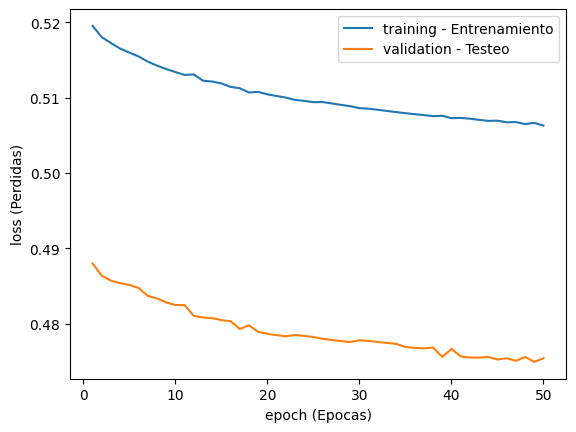

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch (Epocas)')
plt.ylabel('loss (Perdidas)')
plt.legend(['training - Entrenamiento', 'validation - Testeo'], loc='upper right')
plt.show()

## Ver los pesos y sesgos aprendidos

El modelo entrenado consta de los pesos y sesgos finales que determinó el optimizador durante el entrenamiento. Según nuestro modelo de red, deberíamos esperar los siguientes valores para cada capa:
* Capa 1: hay cuatro valores de entrada que van a diez nodos de salida, por lo que debe haber 10 x 4 pesos y 10 valores de sesgo.
* Capa 2: hay diez valores de entrada que van a diez nodos de salida, por lo que debe haber 10 x 10 pesos y 10 valores de sesgo.
* Capa 3: hay diez valores de entrada que van a tres nodos de salida, por lo que debe haber 3 x 10 pesos y 3 valores de sesgo.

In [52]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.19603333 -0.078337    0.1231825   0.5145678 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.22356883  0.5886191  -0.41701362 -0.18117382]
 [ 0.34899795  0.21562788 -0.18960737  0.40357184]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.3545517  -0.15797205 -0.23337851  0.39141223]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.50993603  0.83991164  0.28462753  0.15015654]]
fc1.bias 
 [ 0.02629578 -0.16602173  0.08459234 -0.46684736 -0.3799591  -0.49688837
  0.31546897  0.25728968 -0.22174752  0.2888316 ]
fc2.weight 
 [[ 0.20224687  0.3143725   0.12550515  0.04272011  0.21202639 -0.18619564
   0.05892715 -0.24517313 -0.21917307 -0.16335806]
 [ 0.14308453  0.09426499 -0.18731831  0.09553465  0.804974   -0.0174119
   0.01207405  0.03671877  0.19618031  0.95452875]
 [-0.24369258 -0.09418043  0.12428063  0.2620103   0.4195156   0.3467646
   0.06

## Evaluar el rendimiento del modelo

Entonces, ¿el modelo es bueno? La precisión bruta reportada a partir de los datos de validación parecería indicar que predice bastante bien; pero normalmente es útil profundizar un poco más y comparar las predicciones para cada clase posible. Una forma común de visualizar el rendimiento de un modelo de clasificación es crear una *matriz de confusión* que muestre una tabla cruzada de predicciones correctas e incorrectas para cada clase.

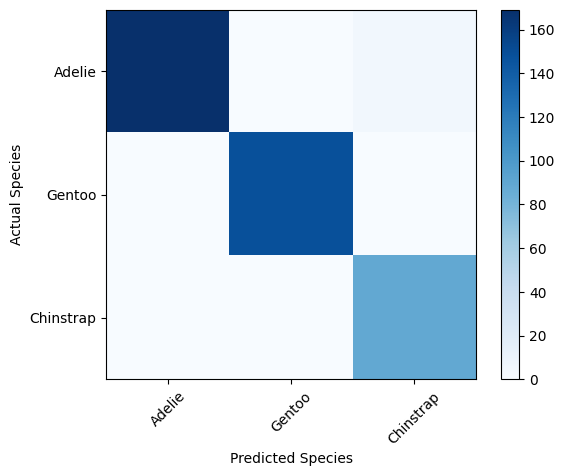

In [54]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguins_classes))
plt.xticks(tick_marks, penguins_classes, rotation=45)
plt.yticks(tick_marks, penguins_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

La matriz de confusión debe mostrar una línea diagonal fuerte que indique que hay más predicciones correctas que incorrectas para cada clase.

## Guardar el modelo entrenado
Ahora que tenemos un modelo que creemos que es razonablemente preciso, podemos guardar sus pesos entrenados para usarlos más tarde.

In [57]:
# Guardamos el modelos 
model_file = 'models/penguin_classifier.pt'

torch.save(model.state_dict(),model_file)
del model
print('modelo guardado en ',model_file)

modelo guardado en  models/penguin_classifier.pt


## Usamos el modelo entrenado

Cuando tenemos una nueva observacion, podemos usar el modelo guardado


In [59]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguins_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo


## Aprende más

Este cuaderno fue diseñado para ayudarlo a comprender los conceptos y principios básicos involucrados en las redes neuronales profundas, utilizando un ejemplo simple de PyTorch. Para obtener más información sobre PyTorch, consulte los [tutoriales en el sitio web de PyTorch](https://pytorch.org/tutorials/).